In [67]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
!pip install mglearn

# Load your data, including testing/training split from Project 1.

In [68]:
water = pd.read_json ('https://data.cityofnewyork.us/resource/ia2d-e54m.json')

In [69]:
water.head()

,year,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198


In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
year                                       40 non-null int64
new_york_city_population                   40 non-null float64
nyc_consumption_million_gallons_per_day    40 non-null float64
per_capita_gallons_per_person_per_day      40 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


In [5]:
water.describe()

,year,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day
count,40.000000,4.000000e+01,40.000000,40.000000
mean,1998.500000,7.794862e+06,1228.540000,159.425000
std,11.690452,4.665209e+05,176.152726,31.989491
min,1979.000000,7.071639e+06,990.200000,117.000000
25%,1988.750000,7.343750e+06,1061.500000,130.750000
50%,1998.500000,7.902960e+06,1228.350000,155.000000
75%,2008.250000,8.145933e+06,1372.250000,186.500000
max,2018.000000,8.475976e+06,1512.000000,213.000000


In [23]:
#Getting rid of null values
water= water.dropna(how='any',axis=0) 

In [70]:
water1 = water[['per_capita_gallons_per_person_per_day']]

In [71]:
water2 = water.drop('per_capita_gallons_per_person_per_day',axis = 1)

In [72]:
X = water2
y = water1

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Working with the Training Set

In [90]:
X_train.head()

,year,new_york_city_population,nyc_consumption_million_gallons_per_day
5,1984,7234514.0,1465.0
16,1995,7633040.0,1325.7
28,2007,8125076.5,1114.0
25,2004,8075020.0,1099.5
24,2003,8058334.5,1093.7


In [91]:
y_train.head()

,per_capita_gallons_per_person_per_day
5,203
16,174
28,137
25,136
24,136


In [92]:
X = X_train
y = y_train

In [ ]:
# Step 3 

# k-Means 

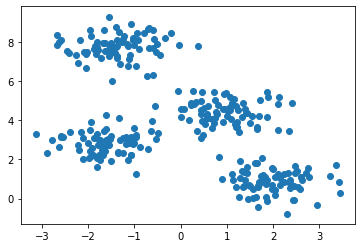

In [27]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

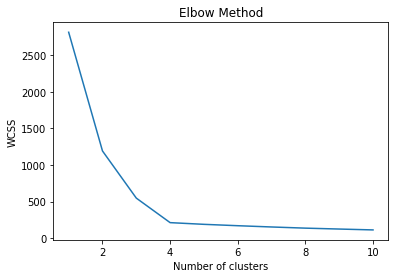

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

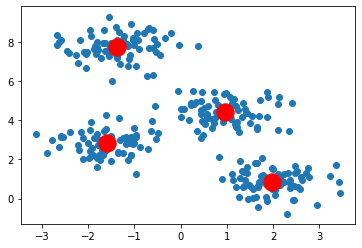

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Aggolmerate/Hierarchical

In [30]:
from sklearn.preprocessing import normalize
data_scaled = normalize(water)
data_scaled = pd.DataFrame(data_scaled, columns=water.columns)
data_scaled.head()

,year,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day
0,0.000279,1.0,0.000213,0.000030
1,0.000280,1.0,0.000213,0.000030
2,0.000279,1.0,0.000185,0.000026
3,0.000279,1.0,0.000194,0.000027
4,0.000276,1.0,0.000198,0.000028


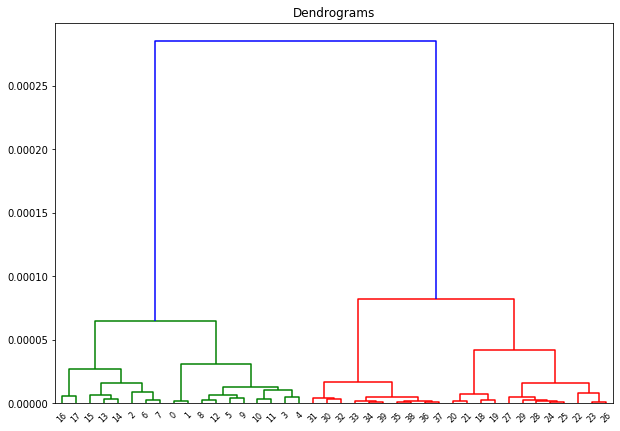

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

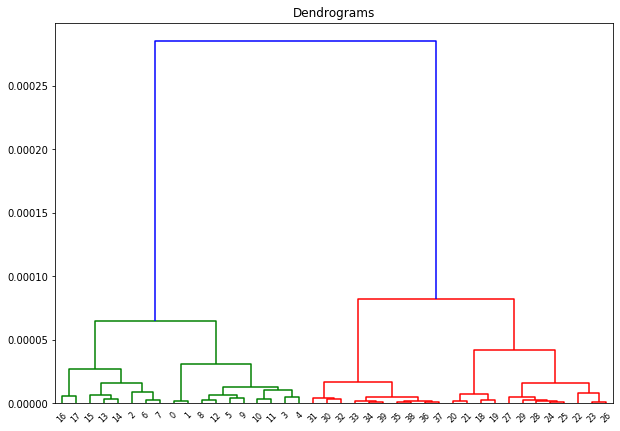

In [18]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# DBSCAN

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0, 0.5, 'Feature 1')

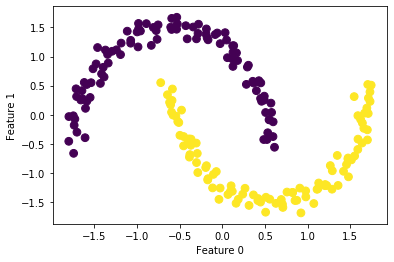

In [49]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,  s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

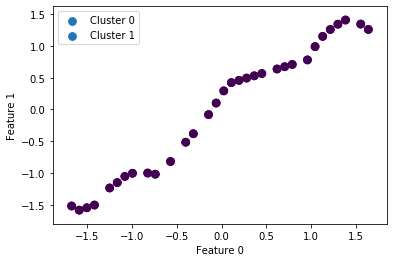

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

dbscan = DBSCAN(min_samples=5,eps=0.2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# PCA for feature selection

In [40]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [73]:

from sklearn.decomposition import PCA
import mglearn
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(water)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(water)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
X_pca1 = pca1.transform(water)


Text(0, 0.5, 'Second principal component')

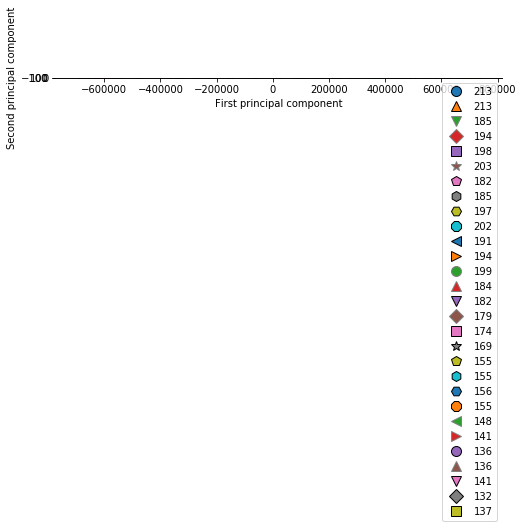

In [76]:
_pca1 = pca1.transform(water)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], water.per_capita_gallons_per_person_per_day)
plt.legend(water.per_capita_gallons_per_person_per_day, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
scaler = StandardScaler()
scaler.fit(water)
X_scaled = scaler.transform(water)

Text(0, 0.5, 'Second principal component')

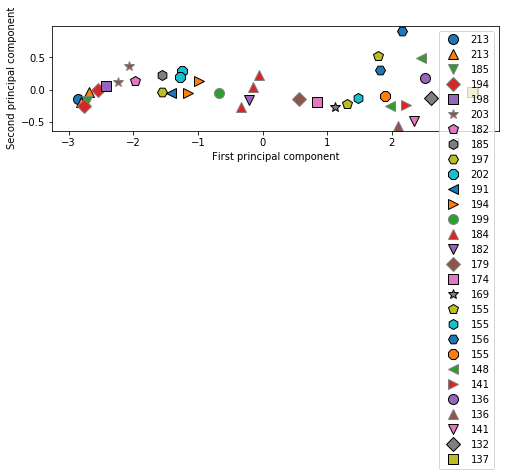

In [78]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], water.per_capita_gallons_per_person_per_day)
plt.legend(water.per_capita_gallons_per_person_per_day, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [79]:
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[9.77671977e-01 1.90159611e-02 3.06721866e-03 2.44842819e-04]


In [80]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.97767198]


In [86]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)
# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_scaled, water.per_capita_gallons_per_person_per_day):
    X_train = X_pca2[train_index]
    X_test = X_pca2[test_index]
    y_train = water.per_capita_gallons_per_person_per_day[train_index]
    y_test = water.per_capita_gallons_per_person_per_day[test_index]

model=LogisticRegression().fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [87]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)
# transform data onto the first ten principal components
X_pca4 = pca4.transform(X_scaled)

for train_index, test_index in split.split(X_scaled,water.per_capita_gallons_per_person_per_day):
    X_train = X_pca4[train_index]
    X_test = X_pca4[test_index]
    y_train = water.per_capita_gallons_per_person_per_day[train_index]
    y_test = water.per_capita_gallons_per_person_per_day[test_index]
    
model=LogisticRegression().fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.